<a href="https://colab.research.google.com/github/jespimentel/estudos_ia/blob/main/relatorio_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho final - Estatística

Para compor a nota da disciplina dois conjuntos de dados devem ser analisados.

O primeiro é o conjunto BreastCancer disponível no software R. Informações sobre tal conjunto de dados podem ser obtidas em: mlbench: Machine Learning Benchmark Problems (r-project.org).


O segundo é o conjunto Boston Housing Dataset também disponível no R. Informações sobre esses dados podem ser encontradas em: Boston function - RDocumentation.


Tarefa 1. Utilize o conjunto BreastCancer para realizar análises de reconhecimento de padrões. Para tanto suponha que a variável Class (última variável do conjunto) não é conhecida. Faça um relatório. Tal relatório deve ser estregue de maneira organizada discutindo os resultados encontrados.


Tarefa 2. Utilizando o mesmo conjunto d dados BreastCancer realize análises de classificação. Para tanto, a variável Class (última variável do conjunto) é nossa variável dependente. Utilize validação cruzada para avaliar os modelos ajustados. Faça um relatório. Tal relatório deve ser entregue de maneira organizada discutindo os resultados encontrados.


Tarefa 3. Utilize o conjunto Boston Housing Dataset predizer o valor médio das casas ocupadas pelo proprietário (medv) por meio de técnicas e predição. Faça um relatório. Tal relatório deve ser estregue de maneira organizada discutindo os resultados encontrados.

# R

In [ ]:
install.packages("mlbench")
library (mlbench)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(BreastCancer) # O comando data() carrega base de dados disponíveis no R
str(BreastCancer)

'data.frame':	699 obs. of  11 variables:
 $ Id             : chr  "1000025" "1002945" "1015425" "1016277" ...
 $ Cl.thickness   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 5 5 3 6 4 8 1 2 2 4 ...
 $ Cell.size      : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 1 1 2 ...
 $ Cell.shape     : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 4 1 8 1 10 1 2 1 1 ...
 $ Marg.adhesion  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 5 1 1 3 8 1 1 1 1 ...
 $ Epith.c.size   : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 2 7 2 3 2 7 2 2 2 2 ...
 $ Bare.nuclei    : Factor w/ 10 levels "1","2","3","4",..: 1 10 2 4 1 10 10 1 1 1 ...
 $ Bl.cromatin    : Factor w/ 10 levels "1","2","3","4",..: 3 3 3 3 3 9 3 3 1 2 ...
 $ Normal.nucleoli: Factor w/ 10 levels "1","2","3","4",..: 1 2 1 7 1 7 1 1 1 1 ...
 $ Mitoses        : Factor w/ 9 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 5 1 ...
 $ Class          : Factor w/ 2 levels "benign","malignant": 1 1 1 1 1 2 1 1 1 1 ...


In [ ]:
summary(BreastCancer)

      Id             Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 Length:699         1      :145   1      :384   1      :353   1      :407  
 Class :character   5      :130   10     : 67   2      : 59   2      : 58  
 Mode  :character   3      :108   3      : 52   10     : 58   3      : 58  
                    4      : 80   2      : 45   3      : 56   10     : 55  
                    10     : 69   4      : 40   4      : 44   4      : 33  
                    2      : 50   5      : 30   5      : 34   8      : 25  
                    (Other):117   (Other): 81   (Other): 95   (Other): 63  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :386   1      :402   2      :166   1      :443     1      :579  
 3      : 72   10     :132   3      :165   10     : 61     2      : 35  
 4      : 48   2      : 30   1      :152   3      : 44     3      : 33  
 1      : 47   5      : 30   7      : 73   2      : 36     10     : 14  
 6      : 41   3      : 28 

In [ ]:
df <- data.frame(BreastCancer)
head(df)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


In [ ]:
# Gravação do arquivo csv para usar o mesmo dataframe com Python
write.csv(df, "bc.csv")

In [ ]:
df_numerico <- read.table("bc.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)

In [ ]:
head(df_numerico)

,X,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1000025,5,1,1,1,2,1,3,1,1,benign
2,2,1002945,5,4,4,5,7,10,3,2,1,benign
3,3,1015425,3,1,1,1,2,2,3,1,1,benign
4,4,1016277,6,8,8,1,3,4,3,7,1,benign
5,5,1017023,4,1,1,3,2,1,3,1,1,benign
6,6,1017122,8,10,10,8,7,10,9,7,1,malignant


In [ ]:
df_numerico_selecao <- df_numerico[,3:11]
head(df_numerico_selecao)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1
2,5,4,4,5,7,10,3,2,1
3,3,1,1,1,2,2,3,1,1
4,6,8,8,1,3,4,3,7,1
5,4,1,1,3,2,1,3,1,1
6,8,10,10,8,7,10,9,7,1


In [ ]:
pca <- princomp(na.omit(df_numerico_selecao))
pca

Call:
princomp(x = na.omit(df_numerico_selecao))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
6.9982536 2.2590345 2.0725049 1.7749876 1.6632837 1.5628982 1.3394326 1.2622909 
   Comp.9 
0.8975633 

 9  variables and  683 observations.

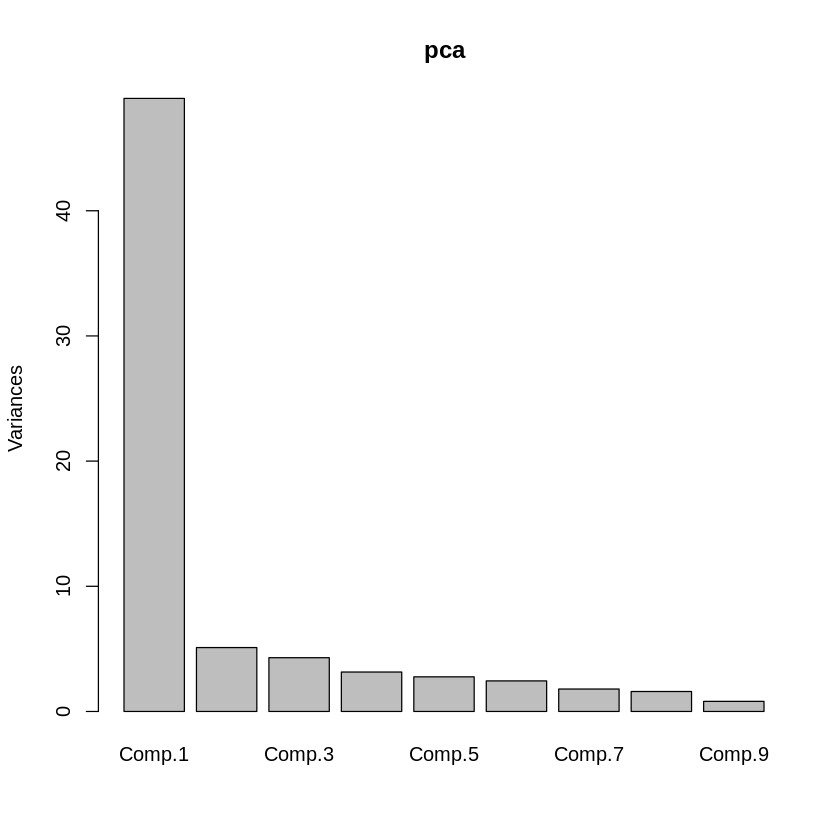

In [ ]:
plot(pca)

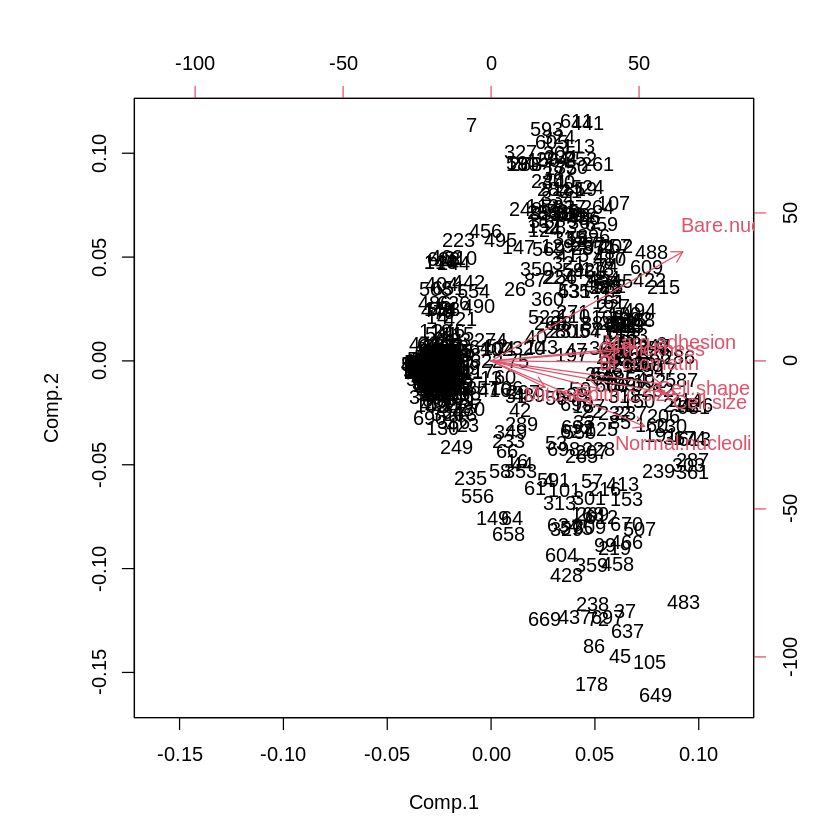

In [ ]:
biplot(pca)

Referências:

https://rpubs.com/PMONIZ80/506010

http://leg.ufpr.br/~lucambio/CE225/20211S/MLGExemplo09.html

